In [1]:
import pickle
import numpy as np

class SeqDataset(object):

    def __init__(self, ids, features, labels, groups, wordRanges, truePos):
        '''
        ids are ids of candidate sequences

        each row of features is 13 features corresponding to the following:
        feature_0: pred_end - pred_start so length of span -1
        feature_1: normalized start position (normalized by number of words)
        feature_2: normalized end position (normalized by number of words)
        feature_4-10: 7 evenly spaced quantiles of the distribution of relevant class probabilities for this sequence
        feature_11: The probability that words on either edge of the current sub-sequence belong to the class of interest
        feature_12: The probability that the first word corresponds to a 'B'-egin token

        labels are binary labels corresponding to whether the candidate sequence is an exact match to a true span

        wordRanges are the start and end (inclusive on both sides) indices of the candidate sequence

        truePos are binary labels corresponding to whether the candidate sequence would be considered a true positive (>0.5 overlap)

        '''
        self.features = np.array(features, dtype=np.float32)
        self.labels = np.array(labels)
        self.groups = np.array(groups, dtype=np.int16)
        self.wordRanges = np.array(wordRanges, dtype=np.int16)
        self.truePos = np.array(truePos)
        self.ids=ids

In [2]:
import pandas as pd

disc_types = ['Evidence','Claim','Lead','Position','Counterclaim','Rebuttal','Concluding Statement']

dfs = []

folder= 'cache' #put pickle files in this folder
for fold in range(8):
    with open(f'{folder}/valid_seqds_fold{fold}.p','rb') as f:
        seqdataset=pickle.load(f)
        
        for disc_type in disc_types:
            x = seqdataset[disc_type]

            df = pd.DataFrame()
            df[[f"f_{i}" for i in range(x.features.shape[1])]] = x.features
            df["id"] = x.ids
            df["class"] = disc_type
            df[["begin", "end"]] = x.wordRanges
            df["kfold"] = fold
            
            dfs.append(df)
            
            
len_features = x.features.shape[1]

In [3]:
oof_df = pd.concat(dfs)
print(oof_df.shape)
oof_df.head()

(36396602, 31)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_21,f_22,f_23,f_24,f_25,id,class,begin,end,kfold
0,1.0,0.183223,0.185430,0.99814,0.998140,0.998140,0.998140,0.998140,0.998140,0.998140,...,0.063751,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,84,0
1,2.0,0.183223,0.187638,0.99814,0.998246,0.998351,0.998456,0.998561,0.998666,0.998772,...,0.063751,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,85,0
2,3.0,0.183223,0.189845,0.99814,0.998351,0.998561,0.998772,0.999045,0.999318,0.999591,...,0.063751,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,86,0
3,4.0,0.183223,0.192053,0.99814,0.998456,0.998772,0.999181,0.999591,0.999803,1.000016,...,0.063751,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,87,0
4,5.0,0.183223,0.194260,0.99814,0.998561,0.999045,0.999591,0.999704,0.999845,1.000016,...,0.063751,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,88,0


In [4]:
oof_df.sample(3, random_state=0).T

,2292640,414170,730356
f_0,28.0,6.0,55.0
f_1,0.399038,0.353791,0.770297
f_2,0.466346,0.375451,0.879208
f_3,0.447876,0.498286,0.005677
f_4,0.5335,0.513187,0.007748
f_5,0.629515,0.523955,0.340487
f_6,0.645559,0.532788,0.495792
f_7,0.657345,0.53791,0.63876
f_8,0.713667,0.539019,0.65098
f_9,0.740807,0.542745,0.675518


In [5]:
gt_df = pd.read_csv("../train_folds.csv")
print(gt_df.shape)
gt_df.head()

(144293, 9)


,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring,kfold
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...,1
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59,1
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75,1
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...,1
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...,1


In [6]:
from tqdm import tqdm


ps = []

for begin, end in tqdm(list(zip(oof_df["begin"].values, oof_df["end"].values))):
    #ps.append(" ".join([str(int(x)) for x in np.arange(begin, end)]))
    ps.append(f"{begin} {end-1}")
oof_df["predictionstring"] = ps    
    
#ps = []

# for begin, end in tqdm(list(zip(gt_df["begin"].values, gt_df["end"].values))):
#     #ps.append(" ".join([str(int(x)) for x in np.arange(begin, end)]))
#     ps.append(f"{begin} {end}")    
# gt_df["predictionstring"] = ps


100%|████████████████████████████████████████████████| 36396602/36396602 [01:35<00:00, 381334.77it/s]


In [7]:
oof_df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_22,f_23,f_24,f_25,id,class,begin,end,kfold,predictionstring
0,1.0,0.183223,0.185430,0.99814,0.998140,0.998140,0.998140,0.998140,0.998140,0.998140,...,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,84,0,83 83
1,2.0,0.183223,0.187638,0.99814,0.998246,0.998351,0.998456,0.998561,0.998666,0.998772,...,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,85,0,83 84
2,3.0,0.183223,0.189845,0.99814,0.998351,0.998561,0.998772,0.999045,0.999318,0.999591,...,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,86,0,83 85
3,4.0,0.183223,0.192053,0.99814,0.998456,0.998772,0.999181,0.999591,0.999803,1.000016,...,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,87,0,83 86
4,5.0,0.183223,0.194260,0.99814,0.998561,0.999045,0.999591,0.999704,0.999845,1.000016,...,0.024413,0.014428,0.002116,0.123147,4AB030046F42,Evidence,83,88,0,83 87


In [8]:
# from Rob Mulla @robikscube
# https://www.kaggle.com/robikscube/student-writing-competition-twitch
def calc_overlap(row):
    """
    Calculates the overlap between prediction and
    ground truth and overlap percentages used for determining
    true positives.
    """
    set_pred = set(row.predictionstring_pred.split(' '))
    set_gt = set(row.predictionstring_gt.split(' '))
    # Length of each and intersection
    len_gt = len(set_gt)
    len_pred = len(set_pred)
    inter = len(set_gt.intersection(set_pred))
    overlap_1 = inter / len_gt
    overlap_2 = inter/ len_pred
    return [overlap_1, overlap_2]


def score_feedback_comp(pred_df, gt_df):
    """
    A function that scores for the kaggle
        Student Writing Competition

    Uses the steps in the evaluation page here:
        https://www.kaggle.com/c/feedback-prize-2021/overview/evaluation
    """
    gt_df = gt_df[['id','discourse_type','predictionstring']]         .reset_index(drop=True).copy()
    pred_df = pred_df[['id','class','predictionstring']]         .reset_index(drop=True).copy()
    pred_df['pred_id'] = pred_df.index
    gt_df['gt_id'] = gt_df.index
    # Step 1. all ground truths and predictions for a given class are compared.
    joined = pred_df.merge(gt_df,
                           left_on=['id','class'],
                           right_on=['id','discourse_type'],
                           how='outer',
                           suffixes=('_pred','_gt')
                          )
    joined['predictionstring_gt'] = joined['predictionstring_gt'].fillna(' ')
    joined['predictionstring_pred'] = joined['predictionstring_pred'].fillna(' ')

    joined['overlaps'] = joined.apply(calc_overlap, axis=1)

    # 2. If the overlap between the ground truth and prediction is >= 0.5,
    # and the overlap between the prediction and the ground truth >= 0.5,
    # the prediction is a match and considered a true positive.
    # If multiple matches exist, the match with the highest pair of overlaps is taken.
    joined['overlap1'] = joined['overlaps'].apply(lambda x: eval(str(x))[0])
    joined['overlap2'] = joined['overlaps'].apply(lambda x: eval(str(x))[1])


    joined['potential_TP'] = (joined['overlap1'] >= 0.5) & (joined['overlap2'] >= 0.5)
    joined['max_overlap'] = joined[['overlap1','overlap2']].max(axis=1)
    tp_pred_ids = joined.query('potential_TP')         .sort_values('max_overlap', ascending=False)         .groupby(['id','predictionstring_gt']).first()['pred_id'].values

    # 3. Any unmatched ground truths are false negatives
    # and any unmatched predictions are false positives.
    fp_pred_ids = [p for p in joined['pred_id'].unique() if p not in tp_pred_ids]

    matched_gt_ids = joined.query('potential_TP')['gt_id'].unique()
    unmatched_gt_ids = [c for c in joined['gt_id'].unique() if c not in matched_gt_ids]

    # Get numbers of each type
    TP = len(tp_pred_ids)
    FP = len(fp_pred_ids)
    FN = len(unmatched_gt_ids)
    #calc microf1
    my_f1_score = TP / (TP + 0.5*(FP+FN))
    return my_f1_score

def calc_overlap_shujun(pred, gt):
    """
    Calculates if the overlap between prediction and
    ground truth is enough fora potential True positive
    """
    try:
        g1=pred[1]+1-gt[0]
        g2=gt[1]+1-pred[0]
        l1=pred[1]-pred[0]+1
        l2=gt[1]-gt[0]+1
        #print(g1,g2)
        if g1*g2>=0:
            #g1=abs(g1)+1
            #g2=abs(g2)+1
            inter=min((g1,g2,l1,l2))#/max((g1,g2,l1,l2))
            overlap_1=inter/l1
            overlap_2=inter/l2
            return overlap_1 >= 0.5 and overlap_2 >= 0.5
        else:
            return False
    except:
        return False


   
    

def score_feedback_comp_micro_shujun(pred_df, gt_df, discourse_type):
    """
    A function that scores for the kaggle
        Student Writing Competition

    Uses the steps in the evaluation page here:
        https://www.kaggle.com/c/feedback-prize-2021/overview/evaluation
    """
    gt_df = gt_df.loc[gt_df['discourse_type'] == discourse_type,
                      ['id', 'predictionstring']].reset_index(drop=True)
    pred_df = pred_df.loc[pred_df['class'] == discourse_type,
                      ['id', 'predictionstring']].reset_index(drop=True)
    pred_df['pred_id'] = pred_df.index
    gt_df['gt_id'] = gt_df.index
    pred_df['predictionstring'] = [(int(pred.split(' ')[0]),int(pred.split(' ')[-1])) for pred in pred_df['predictionstring']]
    gt_df['predictionstring'] = [(int(pred.split(' ')[0]),int(pred.split(' ')[-1])) for pred in gt_df['predictionstring']]


#     print(pred_df[pred_df['predictionstring']!=pred_df['predictionstring']])
#     exit()
    #gt_strings=

    # Step 1. all ground truths and predictions for a given class are compared.
    joined = pred_df.merge(gt_df,
                           left_on='id',
                           right_on='id',
                           how='outer',
                           suffixes=('_pred','_gt')
                          )
    overlaps = [calc_overlap_shujun(*args) for args in zip(list(joined.predictionstring_pred),
                                                     list(joined.predictionstring_gt))]

    # 2. If the overlap between the ground truth and prediction is >= 0.5,
    # and the overlap between the prediction and the ground truth >= 0.5,
    # the prediction is a match and considered a true positive.
    # If multiple matches exist, the match with the highest pair of overlaps is taken.
    # we don't need to compute the match to compute the score
    TP = joined.loc[overlaps]['gt_id'].nunique()

    # 3. Any unmatched ground truths are false negatives
    # and any unmatched predictions are false positives.
    TPandFP = len(pred_df)
    TPandFN = len(gt_df)

    #calc microf1
    my_f1_score = 2*TP / (TPandFP + TPandFN)
    return my_f1_score

def score_feedback_comp_shujun(pred_df, gt_df, return_class_scores=False):
    class_scores = {}
    for discourse_type in gt_df.discourse_type.unique():
        class_score = score_feedback_comp_micro_shujun(pred_df, gt_df, discourse_type)
        class_scores[discourse_type] = class_score
    f1 = np.mean([v for v in class_scores.values()])
    if return_class_scores:
        return f1, class_scores
    return f1

sample_df = oof_df[oof_df["f_7"] > 0.9999].reset_index(drop=True)
print(sample_df.shape)

score_feedback_comp_shujun(sample_df, gt_df, return_class_scores=True)

(854798, 32)


(0.004450438729356249,
 {'Lead': 0.019792000733037066,
  'Position': 0.0,
  'Evidence': 0.010171899709539464,
  'Claim': 3.982794328500876e-05,
  'Concluding Statement': 0.0011493427196322104,
  'Counterclaim': 0.0,
  'Rebuttal': 0.0})

In [9]:
oof_df["idx"] = np.arange(oof_df.shape[0])

eval_df = oof_df[["idx", "id", "class", "predictionstring"]].merge(gt_df[["id", "discourse_type", "predictionstring"]].rename(columns={"predictionstring": "gt_ps",
                                                                                          "discourse_type": 'class'}), 
                      how="left", on=["id", "class"])
eval_df.shape

(102652175, 5)

In [10]:
eval_df.columns

Index(['idx', 'id', 'class', 'predictionstring', 'gt_ps'], dtype='object')

In [11]:
def calc_overlap_shujun_min(pred, gt):
    """
    Calculates if the overlap between prediction and
    ground truth is enough fora potential True positive
    """
    try:
        pred=[int(pred.split()[0]),int(pred.split()[-1])]
        gt=[int(gt.split()[0]),int(gt.split()[-1])]
        g1=pred[1]+1-gt[0]
        g2=gt[1]+1-pred[0]
        l1=pred[1]-pred[0]+1
        l2=gt[1]-gt[0]+1
        #print(g1,g2)
        if g1*g2>=0:
            #g1=abs(g1)+1
            #g2=abs(g2)+1
            inter=min((g1,g2,l1,l2))#/max((g1,g2,l1,l2))
            overlap_1=inter/l1
            overlap_2=inter/l2
            #return overlap_1 >= 0.5 and overlap_2 >= 0.5
            return min(overlap_1,overlap_2)
        else:
            return 0
    except:
        return 0 
def calc_overlap(predictionstring, gt_ps):

    set_pred = set(str(predictionstring).split(" "))
    set_gt = set(str(gt_ps).split(" "))
    # Length of each and intersection
    len_gt = len(set_gt)
    len_pred = len(set_pred)
    inter = len(set_gt.intersection(set_pred))
    overlap_1 = inter / len_gt
    overlap_2 = inter / len_pred
    return min(overlap_1, overlap_2)

    
    
overlap = []

for predictionstring, gt_ps in tqdm(list(zip(eval_df["predictionstring"].values, eval_df["gt_ps"].values))):
    #break
    overlap.append(calc_overlap_shujun_min(predictionstring, gt_ps))
    
    


100%|██████████████████████████████████████████████| 102652175/102652175 [07:39<00:00, 223403.54it/s]


In [12]:
eval_df["overlap"] = overlap

In [13]:
eval_df = eval_df.groupby("idx")["overlap"].max().reset_index()
eval_df.shape

(36396602, 2)

In [14]:
eval_df.head()

,idx,overlap
0,0,0.011628
1,1,0.023256
2,2,0.034884
3,3,0.046512
4,4,0.058140


In [15]:
eval_df.tail()

,idx,overlap
36396597,36396597,0.329412
36396598,36396598,0.341176
36396599,36396599,0.352941
36396600,36396600,0.364706
36396601,36396601,0.376471


In [16]:
oof_df.head()["idx"], oof_df.tail()["idx"]

(0    0
 1    1
 2    2
 3    3
 4    4
 Name: idx, dtype: int64,
 195867    36396597
 195868    36396598
 195869    36396599
 195870    36396600
 195871    36396601
 Name: idx, dtype: int64)

<AxesSubplot:>

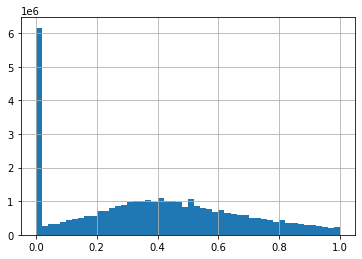

In [17]:
oof_df["overlap"] = eval_df["overlap"].values

oof_df["overlap"].fillna(0.0, inplace=True)

oof_df["overlap"].hist(bins=50)

In [18]:
oof_df.to_parquet(f"{folder}/new_oof_shujun_overlap_calc.parquet", index=False)